# Model Selection
In this notebook, we will focus on model selection. We first import all libraries will be using, define some functions and import the dataset we will be using through out the notebook.

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time


%matplotlib inline
pd.plotting.register_matplotlib_converters()

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE
from sklearn import metrics

sns.set(style = "ticks")

def tsne_plot(d, m):
    """
    Function to visualise clusters with t-SNE for a given dataset d and model m
    """
    d_copy = d.copy()
    
    d_copy["tsne-d1"] = m[:, 0]
    d_copy["tsne-d2"] = m[:, 1]

    plt.figure(figsize=(10,10))
    sns.scatterplot(
        x="tsne-d1", y="tsne-d2",
        palette=sns.color_palette("hls", 10),
        data=d_copy,
        legend="full",
        alpha=0.3
    )

Next, we apply the same transformations we have done in Load & Cleanse notebook to get the dataframe ready.

In [170]:
file_path = "../data/data.csv"
data = pd.read_csv(file_path, index_col = "consumer_id")

cols_with_na = [col for col in data.columns if data[col].isnull().any()]

data.drop(cols_with_na, axis = 1, inplace = True)

## Clustering and Labeling

The sample data is not labeled. So, we cannot use supervised classification algorithms. Therefore, we will first label the data using a clustering algorithm and then use a tree-based classification algorithm to train a classification model. This way, we will be able to classify unseen data based on the classification model we have built.

In this section we will try a couple of different approaches. Namely, we will use _k_-means, DBSCAN and LOF to get clusters. Although LOF is not really a clustering method, I think it will be useful in our case for identifying outliers and label them.

### _k_-means


t-SNE done! Time elapsed: 17.858340978622437 seconds


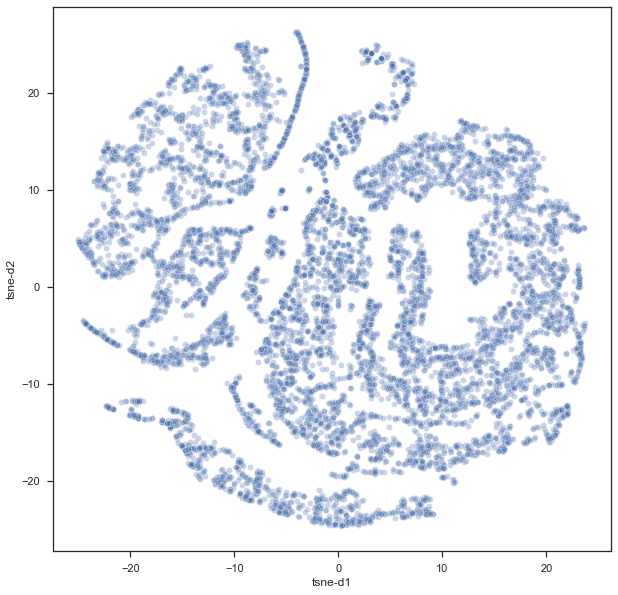

In [205]:
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=40, n_iter=500, verbose = 0, random_state=123, learning_rate=50)
tsne_results = tsne.fit_transform(data)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-start_time))

tsne_plot(data, tsne_results)
plt.savefig("p_40.png")